In [8]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydata_vision"]
mycol = mydb["my_data"]

time =[]
neutral =[]
happy=[]
sad =[]
angry =[]
disgusted =[]
fearful=[]
surprised=[]
time_d=[]


for i in mycol.find():
    time.append(i["time"])
    neutral.append(i["neutral"])
    happy.append(i["happy"])
    sad.append(i["sad"])
    disgusted.append(i["disgusted"])
    fearful.append(i["fearful"])
    angry.append(i["angry"])
    surprised.append(i["surprised"])

time = np.array(time)
neutral = np.array(neutral)
happy =np.array(happy)
sad = np.array(sad)
disgusted = np.array(disgusted)
fearful = np.array(fearful)
angry = np.array(angry)
surprised = np.array(surprised)

numpy_data = np.array([time,neutral,happy,sad,disgusted,fearful,angry,surprised])
all_data =[]
for i in range(len(time)):
	all_data.append([ time[i],neutral[i],happy[i],sad[i],disgusted[i],fearful[i],angry[i],surprised[i]])
df = pd.DataFrame(data=np.array(all_data),columns=["time","neutral","happy","sad","disgusted","fearful","angry","surprised"])
dff_agg = df.drop("time",axis=1).mean()
new_df = pd.DataFrame()
new_df["columns"]=df.drop("time",axis=1).columns
new_df["values"]= dff_agg.values
print(new_df)

     columns        values
0    neutral  9.945683e-01
1      happy  5.630229e-06
2        sad  1.096737e-03
3  disgusted  9.730932e-07
4    fearful  5.886200e-06
5      angry  4.176385e-03
6  surprised  1.460641e-04


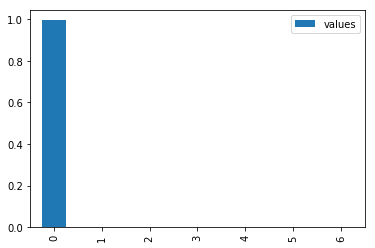

In [9]:
new_df.plot(kind='bar')